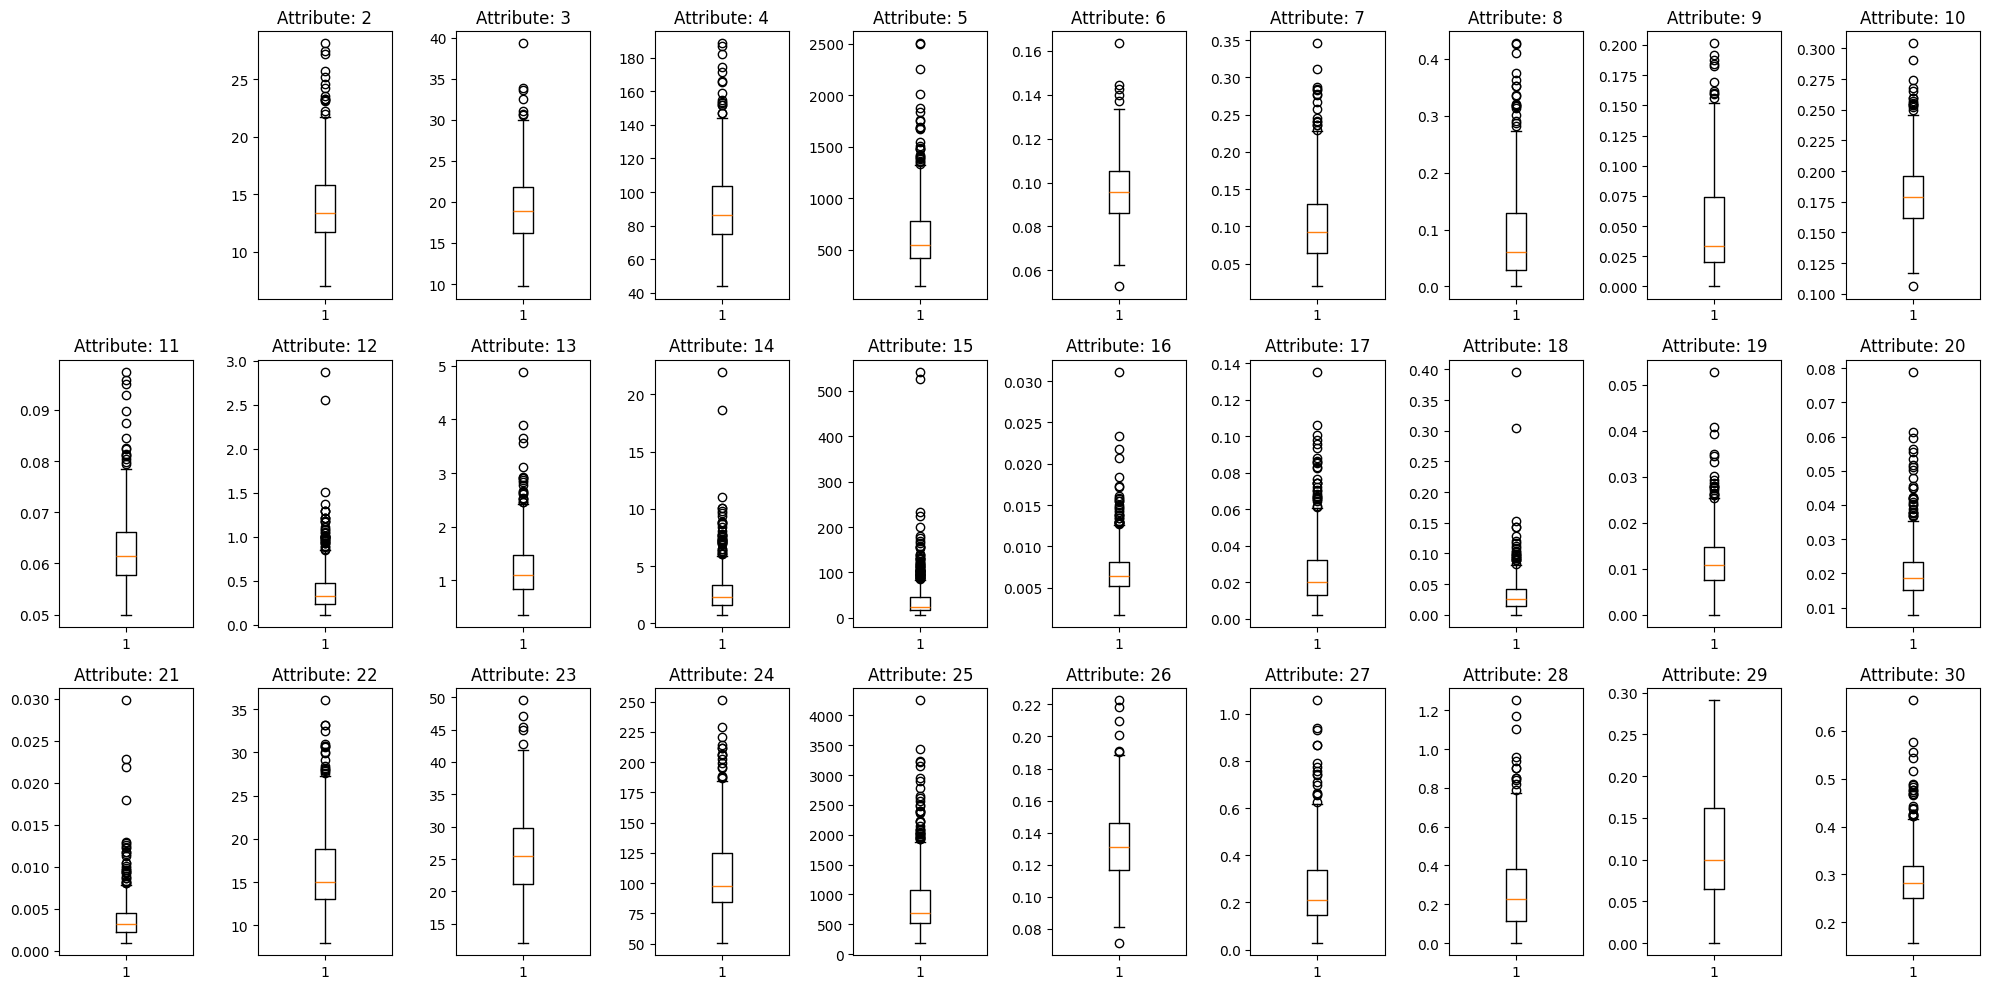

[0.92307692 0.94736842 0.94444444 1.         0.97297297 0.95
 0.92307692 0.97297297 0.88888889 0.87804878] Mean: 0.9400850326973563
[0.97297297 0.94444444 0.88235294 0.97297297 0.94444444 1.
 0.91428571 0.94444444 0.91428571 0.91428571] Mean: 0.9404489363312892
[0.97297297 0.97297297 0.94444444 0.97297297 1.         1.
 0.94736842 0.94444444 0.91428571 0.92307692] Mean: 0.9592538866223077
[0.97297297 0.97297297 0.91428571 0.94444444 1.         0.97297297
 0.97297297 0.94444444 0.91428571 0.91891892] Mean: 0.9528271128271129
[0.97297297 0.97297297 0.94444444 0.97297297 1.         0.95
 0.97297297 0.97297297 0.91428571 0.92307692] Mean: 0.9596671946671946
[0.97297297 0.97297297 0.91428571 0.94444444 0.97297297 1.
 0.97297297 0.94444444 0.91428571 0.89473684] Mean: 0.9504089051457474
[0.97297297 0.97297297 0.94444444 0.97297297 1.         1.
 0.94736842 0.94444444 0.91428571 0.92307692] Mean: 0.9592538866223077
[0.97297297 0.91428571 0.91428571 0.94444444 1.         1.
 0.94736842 0.94444

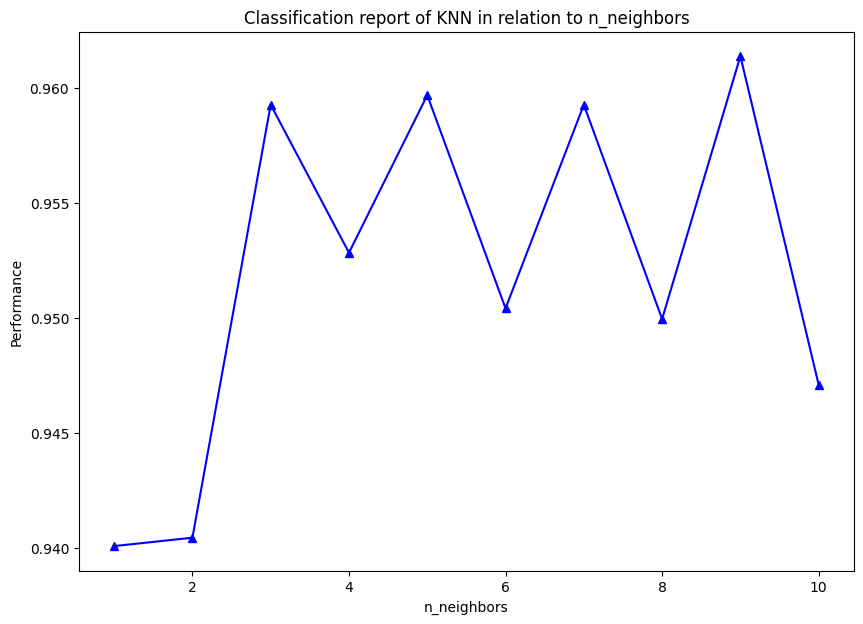

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
#part 1

df = pd.read_csv('wdbc.data')
ct = ColumnTransformer(transformers=[("drop_col2", "drop", [0])], remainder="passthrough")
df_dropped = ct.fit_transform(df)
df_dropped = pd.DataFrame(df_dropped)
dimensions=df_dropped.shape
colnum = dimensions[1] - 1
plt.figure(figsize=(20,10))
for i in range(1, colnum):
  plt.subplot(3,10,i+1)
  plt.boxplot(df_dropped[i])
  plt.title(f"Attribute: {i+1}")
  plt.tight_layout()
plt.show()
#Part 2
pd.set_option('future.no_silent_downcasting', True) # make it so that no warning pops up for future changes in data types
df_filled = df_dropped

for i in range(1, colnum):
    CategoryMean = df_dropped.groupby(0)[i].transform('mean') #Groups it by B or M, each column one by one, then puts the mean for each row dependent on the whether b or m
    df_filled[i] = df_dropped[i].fillna(CategoryMean)

normalization = ColumnTransformer(transformers=[
    ('categorical', OrdinalEncoder(), [df_filled.columns[0]]),
    ('numerical', MinMaxScaler(), list(df_filled.columns[1:]))])

df_normalized = normalization.fit_transform(df_filled)
df_normalized = pd.DataFrame(df_normalized)

X_train, X_test, y_train, y_test = train_test_split(df_normalized.iloc[:, 1:],
 df_normalized.iloc[:, 0], test_size=0.1, stratify=df_normalized.iloc[:, 0], random_state=42)

#Part 3
Skf = StratifiedKFold(n_splits=10)
fig, ax = plt.subplots(figsize=(10,7))
kfold_f1_mean=[]
kvalues = []
for i in range(1,11):
  trainingpipeline = Pipeline([('k-NN', KNeighborsClassifier(n_neighbors=i))])
  scores = cross_val_score(trainingpipeline, X_train, y_train, cv=Skf, scoring = 'f1')
  kvalues.append(i)
  kfold_f1_mean.append(scores.mean())
  print(f"{scores} Mean: {scores.mean()}")
BestNeighbours = kfold_f1_mean.index(max(kfold_f1_mean)) + 1
testingpipeline = Pipeline([('k-NN', KNeighborsClassifier(n_neighbors=BestNeighbours))])
testscores = cross_val_score(testingpipeline, X_test, y_test, cv=Skf, scoring='f1')
print(testscores.mean())
#ax.plot(kvalues, accuracies, color='red', marker='o')
ax.plot(kvalues, kfold_f1_mean, color='blue', marker='^')
#ax.plot(kvalues, Macro_F1_Scores, color='green', marker='s')
ax.set_title("Classification report of KNN in relation to n_neighbors")
ax.set_xlabel("n_neighbors")
ax.set_ylabel("Performance")
plt.show()





In [ ]:
#Part 1
#the program initially ingests all the data in the dataset into a pandas dataset called df.
#Then using ColumnTransformer from the scilearn library, first column full of ID’s numbers is dropped,
#then 1 by 1, by taking all of the columns, a whiskers and box plot is created for all of them,
#which depict the 25th percentile of data (bottom of the box), the 75th percentile of the data (top of box)
#the median(which is the horizontal within the box), 25th percentile minus 1.5 times the IQR (Lower whisker),
#and 75th percent plus 1.5 times the IQR (the upper whisker).
#The program then displays the corresponding boxplot for every column in the dataset for graphical data analysis.

#Part 2, for each column, it finds the mean for each specific categorical variable, so then for each column it will
#find a mean for the rows that are malignant, and a mean for the rows that are benign. Then for each column,
#it looks for empty rows, and replaces its value with its specific categorical mean. After that, the program
#normalizes all the values in each column, by making it all relative (in fractions) to the min and max values
#of the each column, for the categorical column it replaces the m(malignant) with 1 and b(benign) with 0.
# Then all the in the dataset is randomly split to a training data set and a testing data set whilst keeping
# the proportions of the categories (M and B) the same (Stratified). The random state is set to ensure
#repeatability of results, since the dataset is relatively small and model performance could vary noticeably
#without it. The Training data set is 90 percent of the data set, and the testing data set is 10 percent of the dataset.

#Part 3, the training dataset is pipelined through a KNN classifier. The data is split into 10 folds using
#StratifiedKFold, which ensures that each fold maintains the same class distribution as the original target
#variable (y_training). For each value of k (number of neighbors), cross-validation is performed to compute
#the F1-score across all folds, which then all the F1-scores across all folds for each k value(number of neighbours)
#is printed. Then the average F1-score is recorded for each k (number of neighbour). The value of k that yields the
#highest mean F1-score is selected as the optimal number of neighbors. The optimal model is then validated on the test
#set (X_test, Y_test) to evaluate its generalization performance.




